Code adapted from https://github.com/patrickcgray/open-geo-tutorial

# Preparing Dataset

In [1]:
from IPython.display import Audio, display
def alert():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [2]:
alert()

In [3]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
import matplotlib.pyplot as plt
from rasterio.plot import show
from pyproj import CRS

In [4]:
import os # we need os to do some basic file operations
import re
regexp = re.compile(r'_B0[2348]')
sentinal_20m = "./Satellite_images/12_band_images/IMG_DATA_1"
# find every file in the sentinal_fp directory
sentinal_band_paths = [os.path.join(sentinal_20m, f) for f in os.listdir(sentinal_20m) if regexp.search(f) ]
sentinal_band_paths.sort()
sentinal_band_paths

['./Satellite_images/12_band_images/IMG_DATA_1\\T29SMD_20191025T113321_B02.jp2',
 './Satellite_images/12_band_images/IMG_DATA_1\\T29SMD_20191025T113321_B03.jp2',
 './Satellite_images/12_band_images/IMG_DATA_1\\T29SMD_20191025T113321_B04.jp2',
 './Satellite_images/12_band_images/IMG_DATA_1\\T29SMD_20191025T113321_B08.jp2']

In [5]:
for i in sentinal_band_paths : 
        src = rasterio.open(i,driver='JP2OpenJPEG')
        meta = src.meta
        if (not meta['crs']):
            meta['crs'] = CRS.from_epsg(4936)
        print( i + " ::: ")
        print(meta)


./Satellite_images/12_band_images/IMG_DATA_1\T29SMD_20191025T113321_B02.jp2 ::: 
{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': <Geocentric CRS: EPSG:4936>
Name: ETRS89
Axis Info [cartesian]:
- X[geocentricX]: Geocentric X (metre)
- Y[geocentricY]: Geocentric Y (metre)
- Z[geocentricZ]: Geocentric Z (metre)
Area of Use:
- name: Europe - ETRS89
- bounds: (-16.1, 32.88, 40.18, 84.17)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
, 'transform': Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 4400040.0)}
./Satellite_images/12_band_images/IMG_DATA_1\T29SMD_20191025T113321_B03.jp2 ::: 
{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': <Geocentric CRS: EPSG:4936>
Name: ETRS89
Axis Info [cartesian]:
- X[geocentricX]: Geocentric X (metre)
- Y[geocentricY]: Geocentric Y (metre)
- Z[geocentricZ]: Geocentric Z (metre)


In [6]:

# create a products directory within the data dir which won't be uploaded to Github
img_dir = './data/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# filepath for image we're writing out
img_fp = img_dir + 'sentinel_bands_img_data_1.tif'

"""
meta = meta

# Update metadata to reflect the number of layers
meta.update(count = len(sentinal_band_paths))

# Read each layer and write it to stack
with rasterio.open(img_fp, 'w', **meta) as dst:
    for id, layer in enumerate(sentinal_band_paths, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))
"""

"\nmeta = meta\n\n# Update metadata to reflect the number of layers\nmeta.update(count = len(sentinal_band_paths))\n\n# Read each layer and write it to stack\nwith rasterio.open(img_fp, 'w', **meta) as dst:\n    for id, layer in enumerate(sentinal_band_paths, start=1):\n        with rasterio.open(layer) as src1:\n            dst.write_band(id, src1.read(1))\n"

In [7]:
full_dataset = rasterio.open(img_fp)
img_rows, img_cols = full_dataset.shape
img_bands = full_dataset.count
print(full_dataset.shape) # dimensions
print(full_dataset.count) # bands

(10980, 10980)
4


In [8]:
dataset=full_dataset
# what is the name of this image
img_name = dataset.name
print('Image filename: {n}\n'.format(n=img_name))

# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# Does the raster have a description or metadata?
desc = dataset.descriptions
metadata = dataset.meta

print('Raster description: {desc}\n'.format(desc=desc))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
if (not proj) :
    proj = CRS.from_epsg(4936)
print('Image projection:')
print(proj, '\n')

# What is the raster's "geo-transform"
gt = dataset.transform

print('Image geo-transform:\n{gt}\n'.format(gt=gt))

print('All raster metadata:')
print(metadata)
print('\n')

Image filename: ./data/sentinel_bands_img_data_1.tif

Number of bands in image: 4

Image size is: 10980 rows x 10980 columns

Raster description: (None, None, None, None)

Raster driver: JP2OpenJPEG

Image projection:
GEOCCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["metre",1],AXIS["Geocentric X",OTHER],AXIS["Geocentric Y",OTHER],AXIS["Geocentric Z",NORTH],AUTHORITY["EPSG","4936"]] 

Image geo-transform:
| 10.00, 0.00, 399960.00|
| 0.00,-10.00, 4400040.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 4, 'crs': CRS.from_wkt('GEOCCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["metre",1],AXIS["Geocentric X",OTHER],AXIS["Geocentric Y",OTHER],AXIS["Geocentric Z",NORTH],AUTHORITY["EPSG","4936"]]'), 'transform': Affine(10

Cutting arrays for faster process

In [9]:
cutx = 8000
cuty = 8500

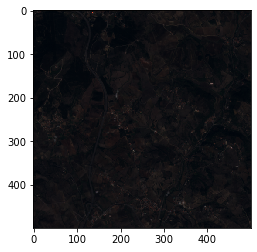

In [10]:
from rasterio.plot import adjust_band
from rasterio.plot import reshape_as_raster, reshape_as_image

rgb_norm = adjust_band(dataset.read([3,2,1])[:,cutx : cuty,cutx : cuty]) # normalize bands to range between 1.0 to 0.0

show(rgb_norm)

# Indices

In [11]:
with rasterio.open(img_fp) as src:
    green_band = src.read(2)[cutx : cuty, cutx : cuty] # band 3
    red_band = src.read(3)[cutx : cuty, cutx : cuty]   # band 4
    nir_band = src.read(4)[cutx : cuty, cutx : cuty]   # band 8
    img = src.read()[:, cutx : cuty, cutx : cuty]
    
ndwi = (green_band.astype(float) - nir_band.astype(float)) / (green_band.astype(float) + nir_band.astype(float))
ndvi = (nir_band.astype(float) - red_band.astype(float)) / (red_band.astype(float) + nir_band.astype(float))

In [12]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors

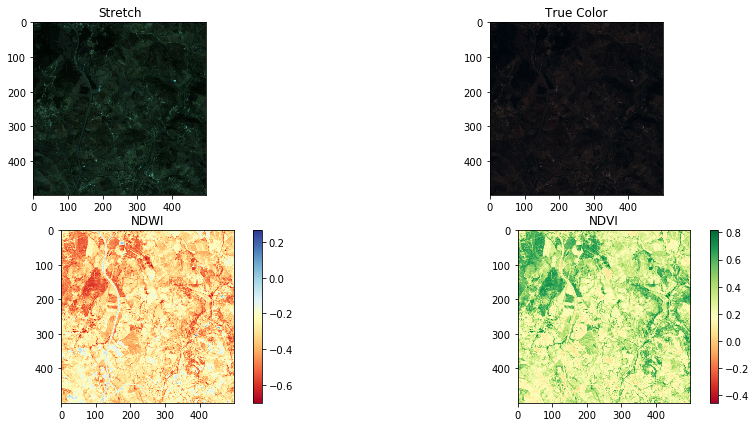

In [13]:
fig, axs = plt.subplots(2,2,figsize=(15,7))

reshaped_img =reshape_as_image( img )
img_stretched = color_stretch(reshaped_img, [2, 1, 0])
axs[0,0].set_title("Stretch")
axs[0,0].imshow(img_stretched)

axs[0,1].set_title("True Color")
axs[0,1].imshow(reshape_as_image(rgb_norm))

nwdi_plot = axs[1,0].imshow(ndwi, cmap="RdYlBu")
axs[1,0].set_title("NDWI")
fig.colorbar(nwdi_plot, ax=axs[1,0])

ndvi_plot = axs[1,1].imshow(ndvi, cmap="RdYlGn")
axs[1,1].set_title("NDVI")
fig.colorbar(ndvi_plot, ax=axs[1,1])

plt.show()

In [14]:
src.close()

# Setting up label data with bands

In [61]:
shapefile = gpd.read_file('./data/shapefiles/CLC2012_PT_v2/CLC2012_PT_v2.shp')
shapefile.head()

,AREA_ha,CLC2012,Legenda,ID,geometry
0,287.471754,111,Tecido urbano contínuo,1,"POLYGON ((18685.920 -293338.386, 18770.193 -29..."
1,275.900895,111,Tecido urbano contínuo,2,"POLYGON ((26764.900 -291471.875, 26786.334 -29..."
2,101.100914,111,Tecido urbano contínuo,3,"POLYGON ((3106.160 -287769.063, 3100.722 -2878..."
3,28.932375,111,Tecido urbano contínuo,4,"POLYGON ((-48135.685 -284368.597, -48105.974 -..."
4,109.973855,111,Tecido urbano contínuo,5,"POLYGON ((-21147.143 -284032.092, -21014.035 -..."


In [62]:
shapefile = shapefile.filter(['Legenda', 'geometry'])
shapefile.head()

,Legenda,geometry
0,Tecido urbano contínuo,"POLYGON ((18685.920 -293338.386, 18770.193 -29..."
1,Tecido urbano contínuo,"POLYGON ((26764.900 -291471.875, 26786.334 -29..."
2,Tecido urbano contínuo,"POLYGON ((3106.160 -287769.063, 3100.722 -2878..."
3,Tecido urbano contínuo,"POLYGON ((-48135.685 -284368.597, -48105.974 -..."
4,Tecido urbano contínuo,"POLYGON ((-21147.143 -284032.092, -21014.035 -..."


In [63]:
unique= np.unique(shapefile['Legenda'])
print('List of Land Cover Classes:')
unique

List of Land Cover Classes:


array(['Aeroportos e aeródromos',
       'Agricultura com espaços naturais e semi-naturais', 'Arrozais',
       'Culturas temporárias de regadio',
       'Culturas temporárias de sequeiro',
       'Culturas temporárias e/ou pastagens associadas a culturas permanentes',
       'Cursos de água', 'Desembocaduras fluviais',
       'Equipamentos desportivos, culturais e de lazer e zonas históricas',
       'Espaços verdes urbanos',
       'Florestas abertas, cortes e novas plantações',
       'Florestas de folhosas', 'Florestas de resinosas',
       'Florestas mistas', 'Indústria, comércio e equipamentos gerais',
       'Lagoas costeiras', 'Matos', 'Oceano', 'Olivais',
       'Pastagens permanentes', 'Paúis', 'Planos de água', 'Pomares',
       'Praias, dunas e areais',
       'Redes viárias e ferroviárias e espaços associados', 'Rocha nua',
       'Salinas e aquicultura litoral', 'Sapais',
       'Sistemas agro-florestais',
       'Sistemas culturais e parcelares complexos',
       'Tecido

In [64]:
full_dataset.crs

CRS.from_wkt('GEOCCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["metre",1],AXIS["Geocentric X",OTHER],AXIS["Geocentric Y",OTHER],AXIS["Geocentric Z",NORTH],AUTHORITY["EPSG","4936"]]')

In [19]:
shapefile.crs

{'proj': 'tmerc',
 'lat_0': 39.6682583333333,
 'lon_0': -8.13310833333333,
 'k': 1,
 'x_0': 0,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [71]:
shapefile = shapefile.to_crs(proj)
shapefile.to_crs({'init': 'epsg:32629'})

C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,Legenda,geometry
0,Tecido urbano contínuo,"POLYGON ((619837.798 0.000, 619943.025 0.000, ..."
1,Tecido urbano contínuo,"POLYGON ((629950.056 0.000, 629976.773 0.000, ..."
2,Tecido urbano contínuo,"POLYGON ((600354.434 0.000, 600347.604 0.000, ..."
3,Tecido urbano contínuo,"POLYGON ((536205.422 0.000, 536242.983 0.000, ..."
4,Tecido urbano contínuo,"POLYGON ((569990.452 0.000, 570157.416 0.000, ..."
...,...,...
53771,Desembocaduras fluviais,"POLYGON ((533514.937 0.000, 533501.969 0.000, ..."
53772,Desembocaduras fluviais,"POLYGON ((523531.696 0.000, 523577.065 0.000, ..."
53773,Desembocaduras fluviais,"POLYGON ((525390.169 0.000, 525582.586 0.000, ..."
53774,Desembocaduras fluviais,"POLYGON ((527506.523 0.000, 527474.636 0.000, ..."


In [65]:
len(shapefile)

53776

In [72]:
shapefile.crs

CRS.from_wkt('GEOCCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["metre",1],AXIS["Geocentric X",OTHER],AXIS["Geocentric Y",OTHER],AXIS["Geocentric Z",NORTH],AUTHORITY["EPSG","4936"]]')

In [73]:
# this generates a list of shapely geometries
geoms = shapefile.geometry.values 

# let's grab a single shapely geometry to check
geometry = geoms[0] 
print(type(geometry))
print(geometry)

# transform to GeoJSON format
from shapely.geometry import mapping
feature = [mapping(geometry)] # can also do this using polygon.__geo_interface__
print(type(feature))
print(feature)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((5049623.712050091 -702769.4317494183, 5049673.394679092 -702691.4040439334, 5049683.378841758 -702488.2292920811, 5049701.701994047 -702227.7943281919, 5049758.245786745 -702344.5905194703, 5049811.814728088 -702489.9778725191, 5049855.104988734 -702644.7503855681, 5049896.074404362 -702621.2704580659, 5049927.636804025 -702590.5708256225, 5049966.717160258 -702571.005484523, 5049985.713872843 -702543.5401310227, 5049995.707981183 -702504.7282157019, 5049998.974584104 -702459.9247210228, 5049991.407899318 -702406.0280154012, 5049993.33887435 -702338.3984885701, 5050014.758988388 -702293.6743586324, 5050038.997942457 -702271.9882319318, 5050068.43010273 -702288.7694678821, 5050114.827827162 -702335.6404708294, 5050148.975853795 -702328.0297686369, 5050172.751574462 -702276.5052622004, 5050225.414981765 -702179.8005234613, 5050268.308843507 -702160.2249037476, 5050315.623196968 -702178.8382243444, 5050362.171429653 -702236.8523908689, 

In [74]:
shapefile.crs == full_dataset.crs

True

In [75]:
out_image, out_transform = mask(full_dataset, feature, crop=True)
out_image.shape

ValueError: Input shapes do not overlap raster.

In [ ]:
X = np.array([], dtype=np.int8).reshape(0,8) # pixels for training
y = np.array([], dtype=np.string_) # labels for training

# extract the raster values within the polygon 
with rasterio.open(img_fp) as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]

        # the mask function returns an array of the raster pixels within this feature
        out_image, out_transform = mask(src, feature, crop=True) 
        # eliminate all the pixels with 0 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image[:,~np.all(out_image == 0, axis=0)]
        # eliminate all the pixels with 255 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image_trimmed[:,~np.all(out_image_trimmed == 255, axis=0)]
        # reshape the array to [pixel count, bands]
        out_image_reshaped = out_image_trimmed.reshape(-1, band_count)
        # append the labels to the y array
        y = np.append(y,[shapefile["Classname"][index]] * out_image_reshaped.shape[0]) 
        # stack the pizels onto the pixel array
        X = np.vstack((X,out_image_reshaped))

In [ ]:
# What are our classification labels?
labels = np.unique(shapefile["Classname"])
print('The training data include {n} classes: {classes}\n'.format(n=labels.size, 
                                                                classes=labels))

# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))


In [ ]:
fig, ax = plt.subplots(1,3, figsize=[20,8])

# numbers 1-8
band_count = np.arange(1,9)

classes = np.unique(y)
for class_type in classes:
    band_intensity = np.mean(X[y==class_type, :], axis=0)
    ax[0].plot(band_count, band_intensity, label=class_type)
    ax[1].plot(band_count, band_intensity, label=class_type)
    ax[2].plot(band_count, band_intensity, label=class_type)
# plot them as lines

# Add some axis labels
ax[0].set_xlabel('Band #')
ax[0].set_ylabel('Reflectance Value')
ax[1].set_ylabel('Reflectance Value')
ax[1].set_xlabel('Band #')
ax[2].set_ylabel('Reflectance Value')
ax[2].set_xlabel('Band #')
#ax[0].set_ylim(32,38)
ax[1].set_ylim(32,38)
ax[2].set_ylim(70,140)
#ax.set
ax[1].legend(loc="upper right")
# Add a title
ax[0].set_title('Band Intensities Full Overview')
ax[1].set_title('Band Intensities Lower Ref Subset')
ax[2].set_title('Band Intensities Higher Ref Subset')

In [ ]:
def str_class_to_int(class_array):
    class_array[class_array == 'Subtidal Haline'] = 0
    class_array[class_array == 'WetSand'] = 1
    class_array[class_array == 'Emergent Wetland'] = 2
    class_array[class_array == 'Sand'] = 3
    class_array[class_array == 'Herbaceous'] = 4
    class_array[class_array == 'Forested Wetland'] = 5
    return(class_array.astype(int))

# Supervised Classification Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

In [ ]:
with rasterio.open(img_fp) as src:
    # may need to reduce this image size if your kernel crashes, takes a lot of memory
    img = src.read()[:, 150:600, 250:1400]

# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification
print(img.shape)
reshaped_img = reshape_as_image(img)
print(reshaped_img.shape)

In [ ]:
class_prediction = gnb.predict(reshaped_img.reshape(-1, 8))

# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction = class_prediction.reshape(reshaped_img[:, :, 0].shape)

In [ ]:
class_prediction = str_class_to_int(class_prediction)

# Visualizing results 

In [ ]:
alert()